In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grocery-sales-dataset/countries.csv
/kaggle/input/grocery-sales-dataset/products.csv
/kaggle/input/grocery-sales-dataset/categories.csv
/kaggle/input/grocery-sales-dataset/cities.csv
/kaggle/input/grocery-sales-dataset/employees.csv
/kaggle/input/grocery-sales-dataset/sales.csv
/kaggle/input/grocery-sales-dataset/customers.csv


In [2]:
# Carregar os datasets

countries = pd.read_csv("/kaggle/input/grocery-sales-dataset/countries.csv")
products = pd.read_csv("/kaggle/input/grocery-sales-dataset/products.csv")
categories = pd.read_csv("/kaggle/input/grocery-sales-dataset/categories.csv")
cities = pd.read_csv("/kaggle/input/grocery-sales-dataset/cities.csv")
employees = pd.read_csv("/kaggle/input/grocery-sales-dataset/employees.csv")
sales = pd.read_csv("/kaggle/input/grocery-sales-dataset/sales.csv")
customers = pd.read_csv("/kaggle/input/grocery-sales-dataset/customers.csv")

In [3]:
datasets = [
    ("countries", countries),
    ("products", products),
    ("categories", categories),
    ("cities", cities),
    ("employees", employees),
    ("sales", sales),
    ("customers", customers)
    ]

# Exibindo as primeiras 5 linhas de cada dataset
data_head = {name: df.head() for name, df in datasets}
data_head

{'countries':    CountryID CountryName CountryCode
 0          1     Armenia          AN
 1          2      Canada          FO
 2          3      Belize          MK
 3          4      Uganda          LV
 4          5    Thailand          VI,
 'products':    ProductID                 ProductName    Price  CategoryID   Class  \
 0          1         Flour - Whole Wheat  74.2988           3  Medium   
 1          2  Cookie Chocolate Chip With  91.2329           3  Medium   
 2          3          Onions - Cippolini   9.1379           9  Medium   
 3          4  Sauce - Gravy, Au Jus, Mix  54.3055           9  Medium   
 4          5      Artichokes - Jerusalem  65.4771           2     Low   
 
                 ModifyDate Resistant IsAllergic  VitalityDays  
 0  2018-02-16 08:21:49.190   Durable    Unknown           0.0  
 1  2017-02-12 11:39:10.970   Unknown    Unknown           0.0  
 2  2018-03-15 08:11:51.560      Weak      False         111.0  
 3  2017-07-16 00:46:28.880   Durable   

# Análise Descritiva Inicial
Vamos procurar informações iniciais sobre as tabelas

In [4]:
def analise_descritiva(df, nome_df):
    print(f"Análise do {nome_df}")
    
    #Informações iniciais
    print("\n1. Informações Gerais:")
    print(f"Número de linhas e colunas {df.shape}")
    print(f"Tipo de Dados:\n{df.dtypes}")
    
    #Valores ausentes
    print("\n2. Valores ausentes:")
    print(df.isnull().sum())
    
    #Estatísticas
    print("\n2. Estatísticas:")
    print(df.describe())

    # 4. Distribuição das variáveis categóricas
    print("\n4. Distribuição das variáveis categóricas:")
    for col in df.select_dtypes(include='object').columns:
        print(f"\nDistribuição de '{col}':")
        print(df[col].value_counts())
    print("\n" + "-"*50)
    
for nome_df, dataset in datasets:
    analise_descritiva(dataset, nome_df)

Análise do countries

1. Informações Gerais:
Número de linhas e colunas (206, 3)
Tipo de Dados:
CountryID       int64
CountryName    object
CountryCode    object
dtype: object

2. Valores ausentes:
CountryID      0
CountryName    0
CountryCode    1
dtype: int64

2. Estatísticas:
        CountryID
count  206.000000
mean   103.500000
std     59.611241
min      1.000000
25%     52.250000
50%    103.500000
75%    154.750000
max    206.000000

4. Distribuição das variáveis categóricas:

Distribuição de 'CountryName':
CountryName
Armenia       1
Guam          1
Micronesia    1
Jordan        1
Poland        1
             ..
Algeria       1
Portugal      1
Serbia        1
France        1
Mongolia      1
Name: count, Length: 206, dtype: int64

Distribuição de 'CountryCode':
CountryCode
AN    1
CI    1
KM    1
SD    1
SI    1
     ..
NE    1
VE    1
KP    1
ZM    1
MZ    1
Name: count, Length: 205, dtype: int64

--------------------------------------------------
Análise do products

1. Informaç

In [5]:
datasets = [
    ("products", products),
    ("sales", sales),
    ]

Gerando o gráfico de products


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


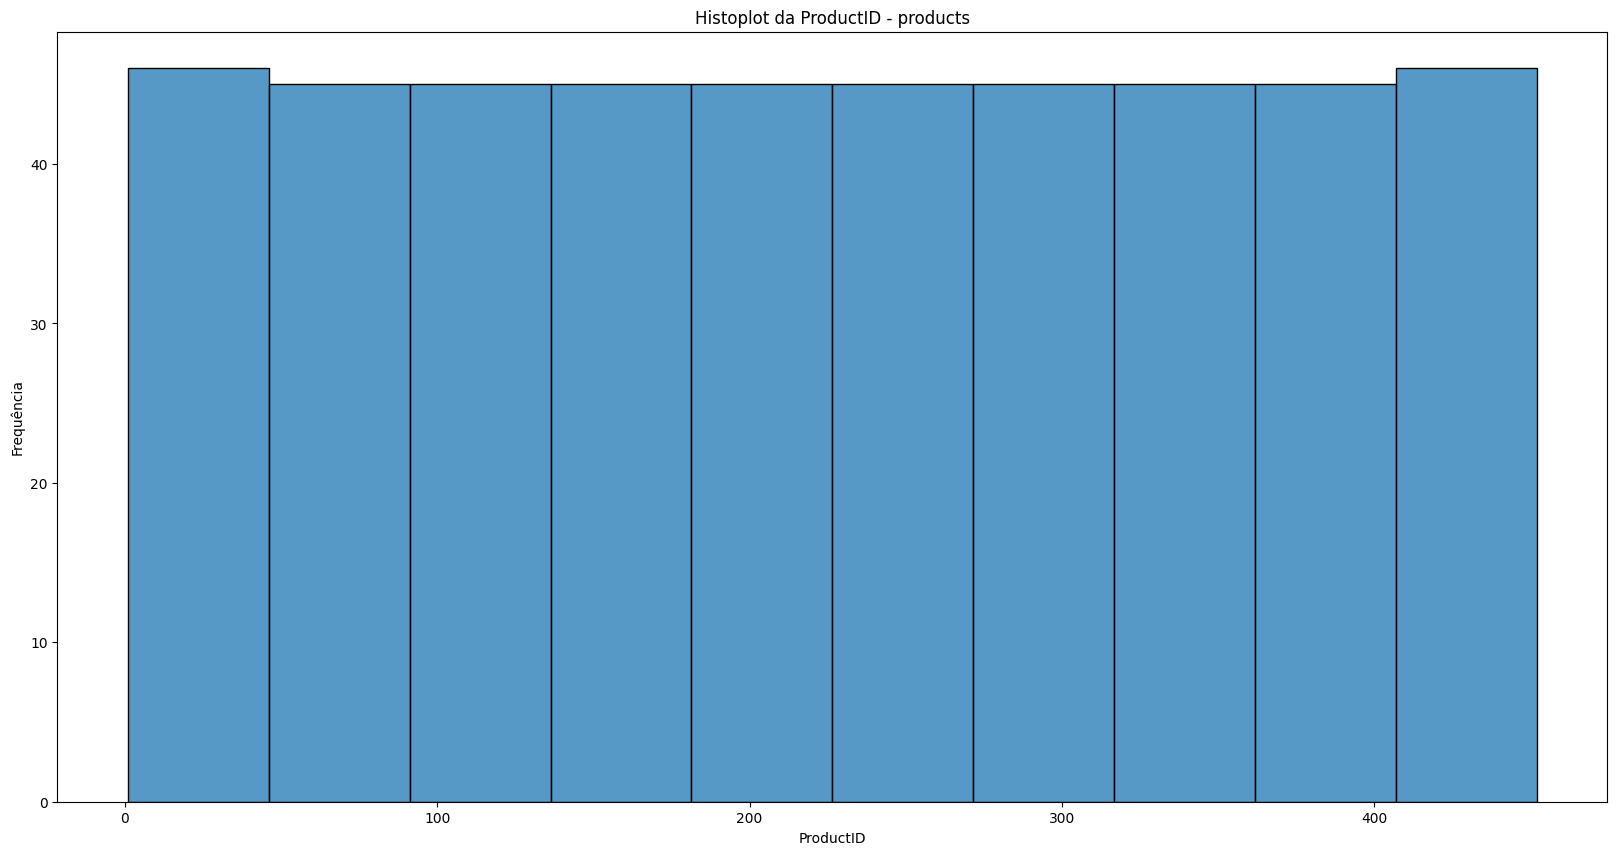

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


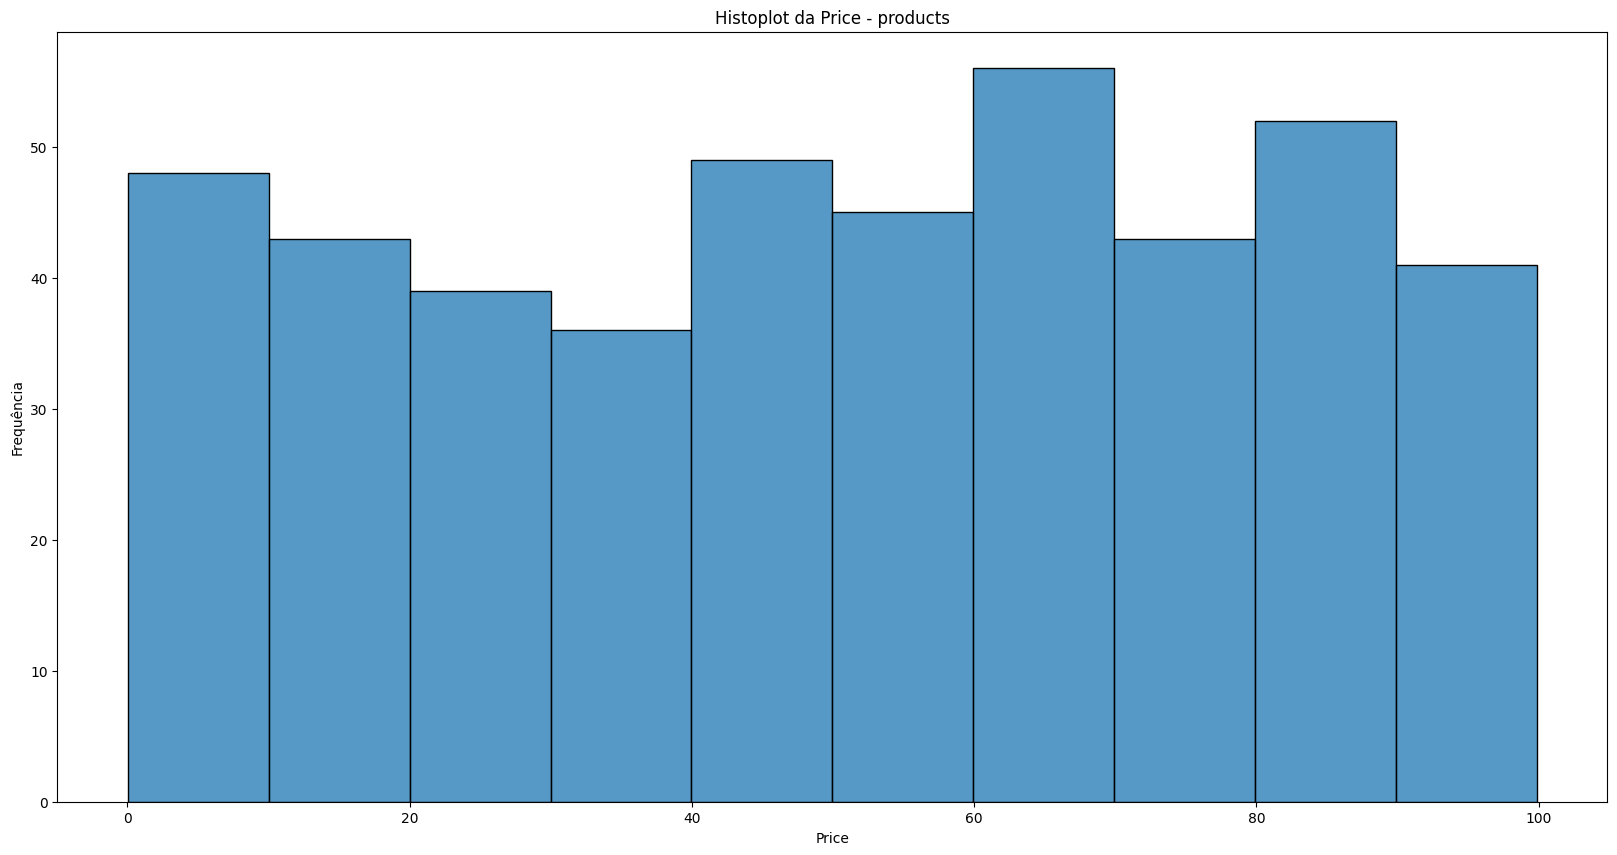

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


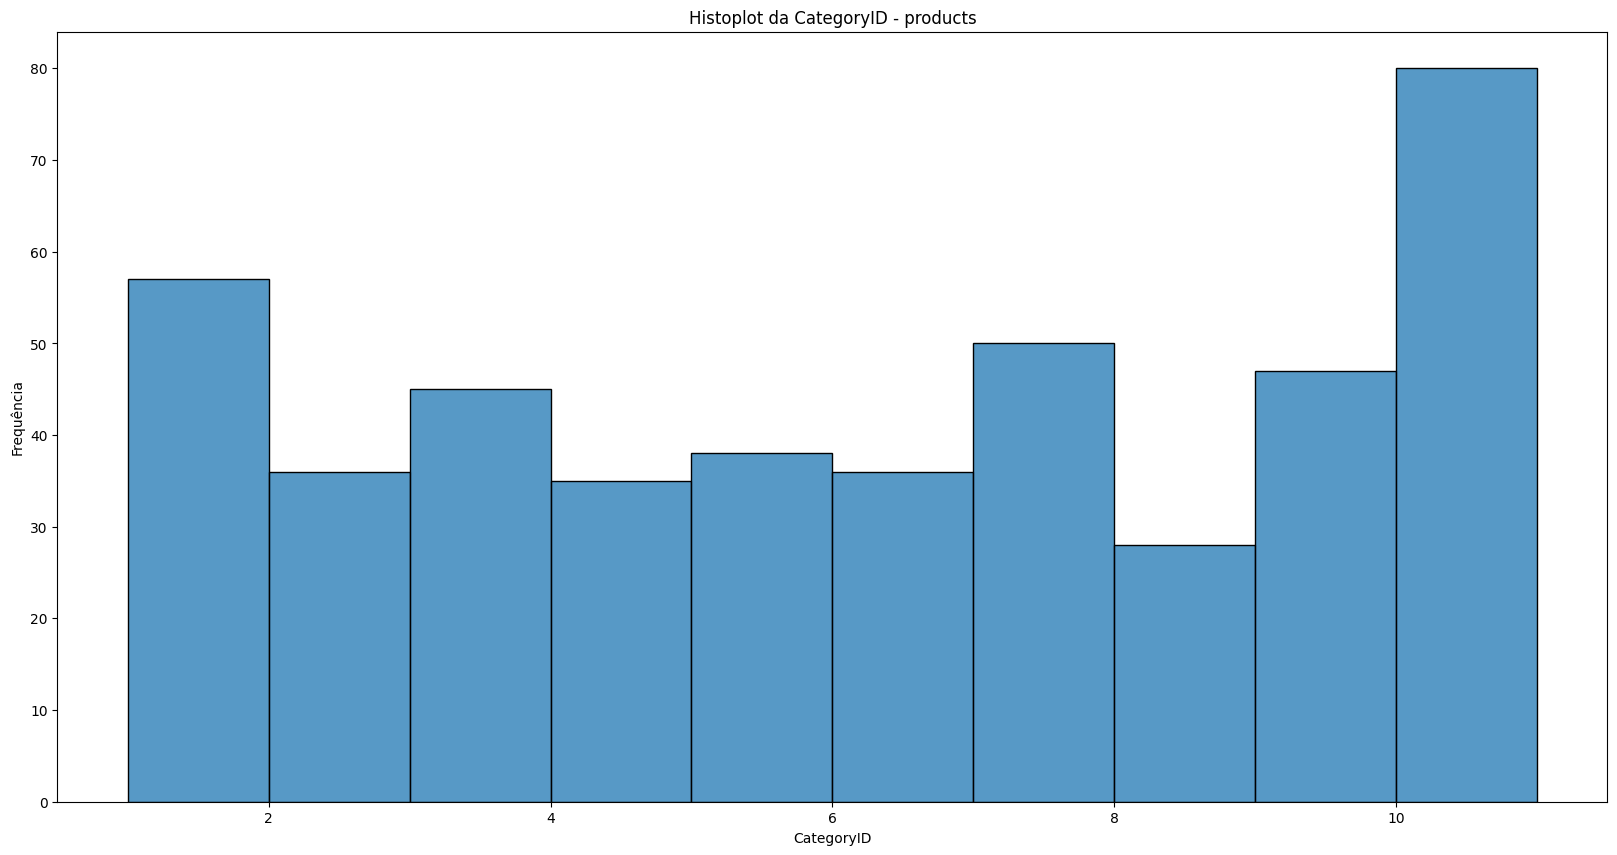

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


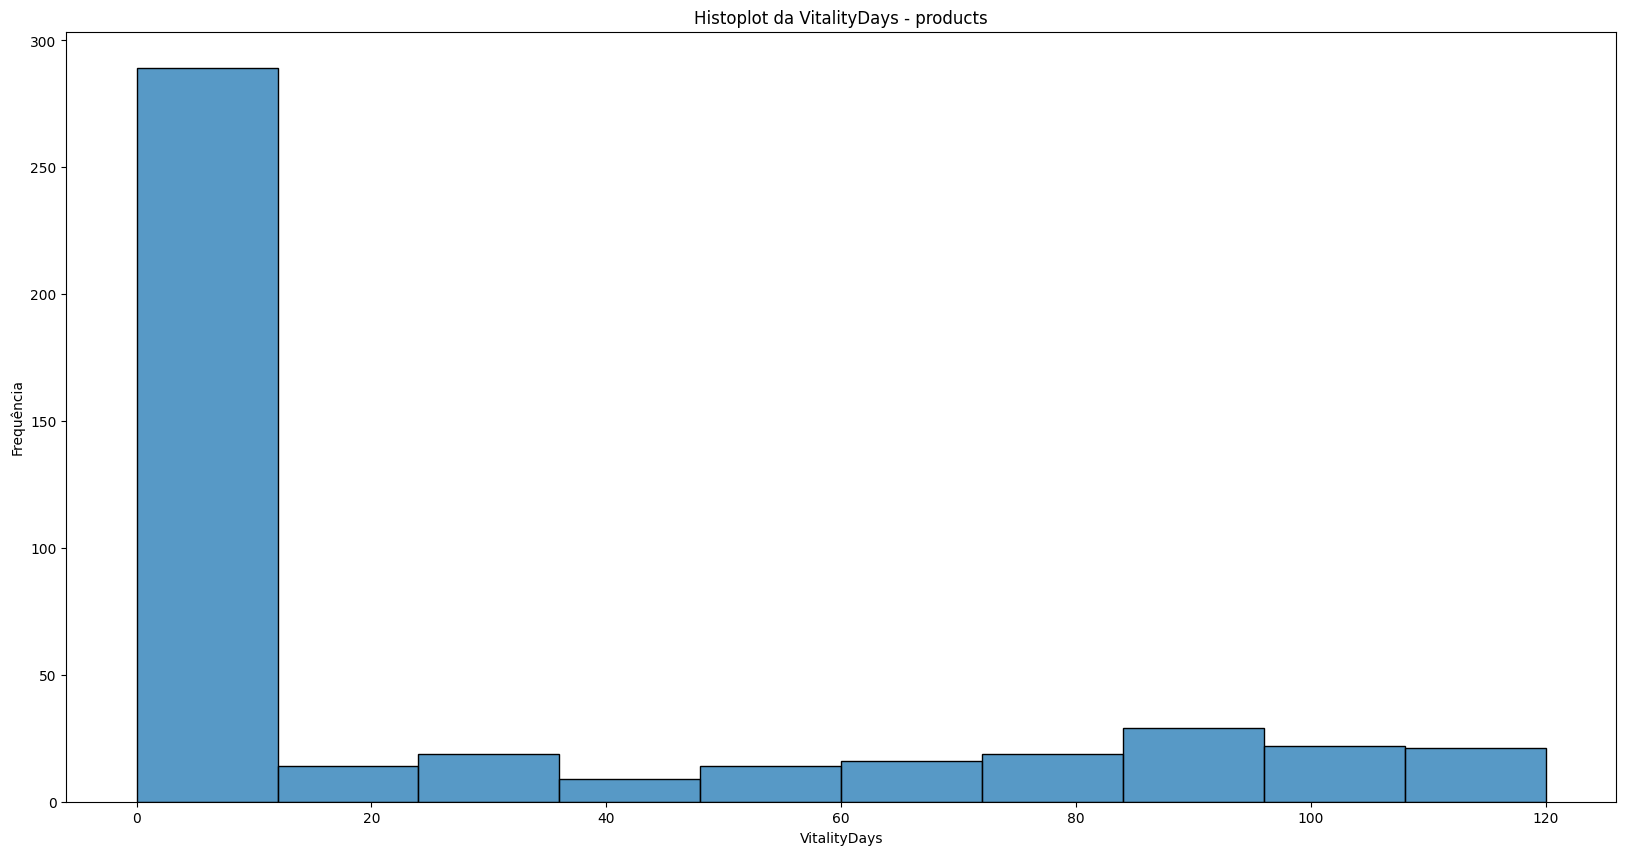

Gerando o gráfico de sales


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


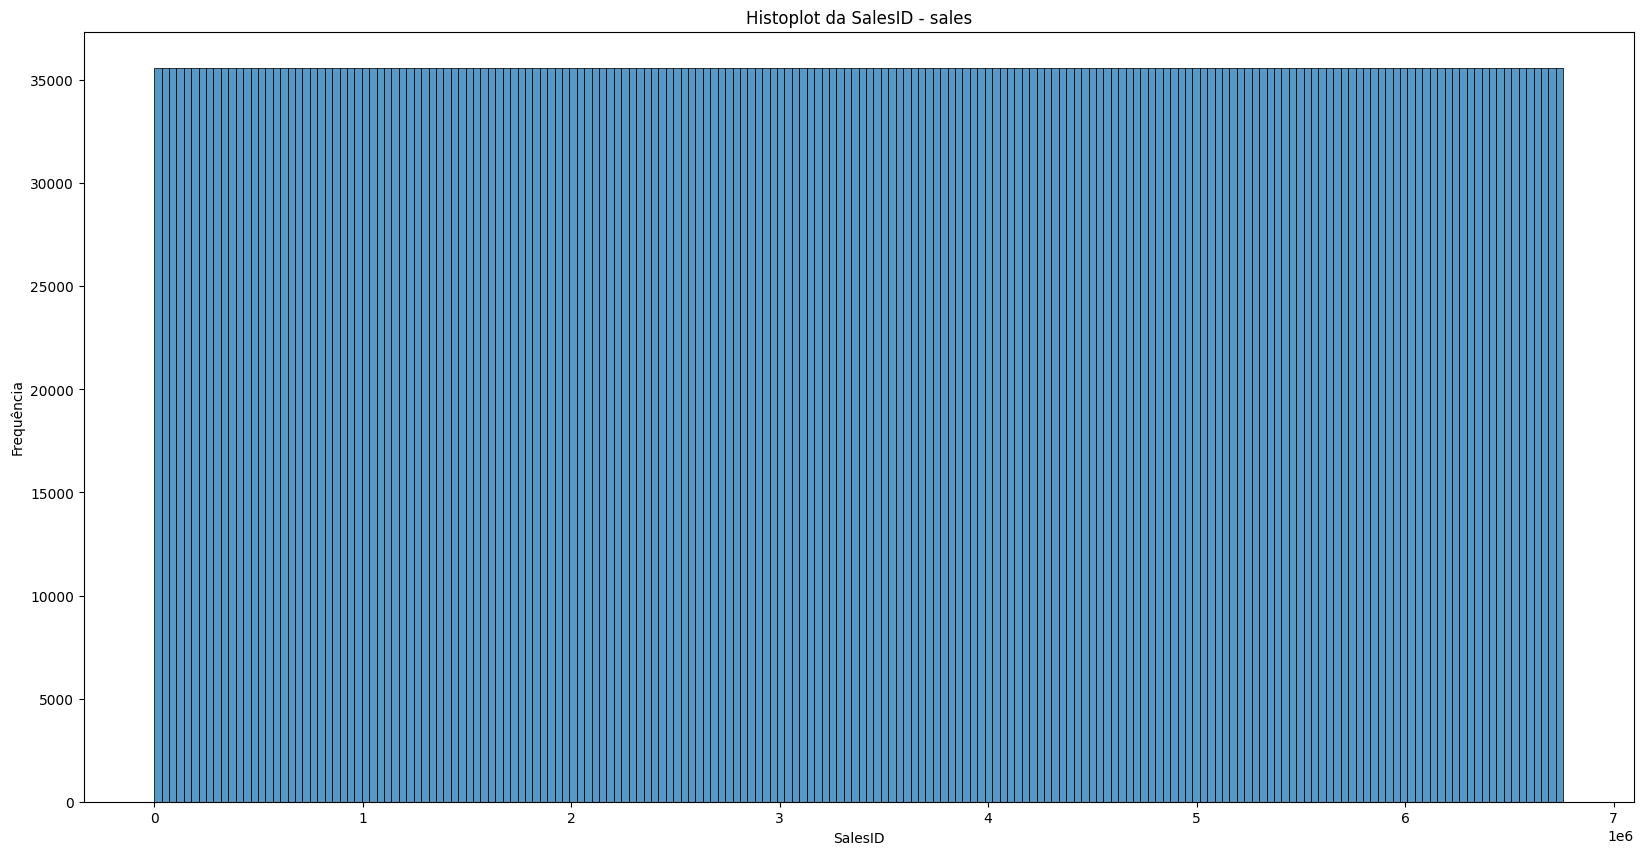

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


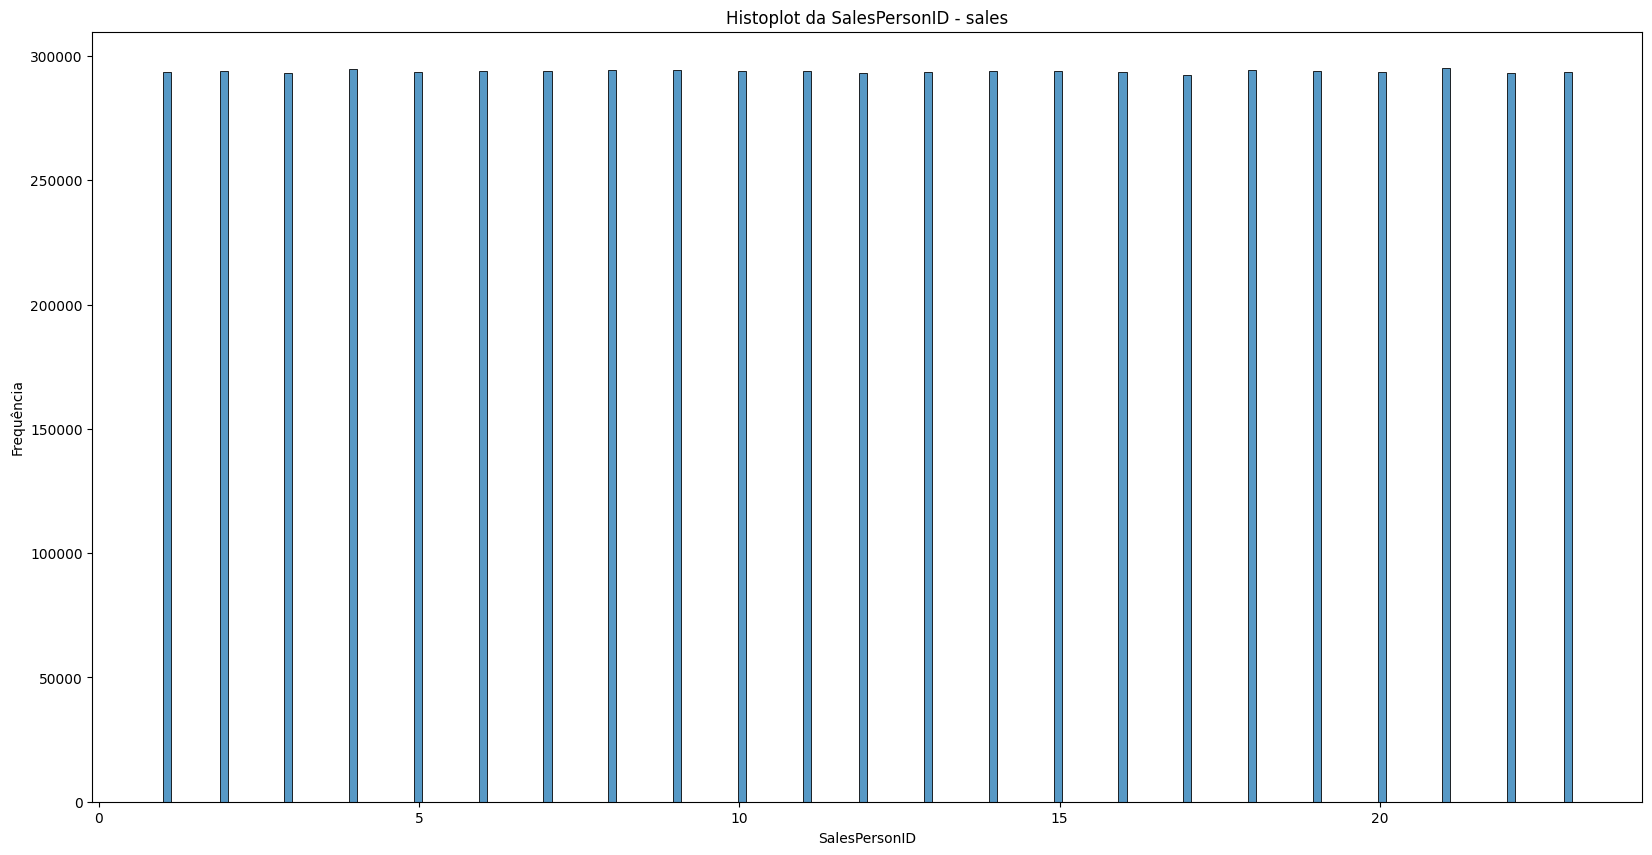

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


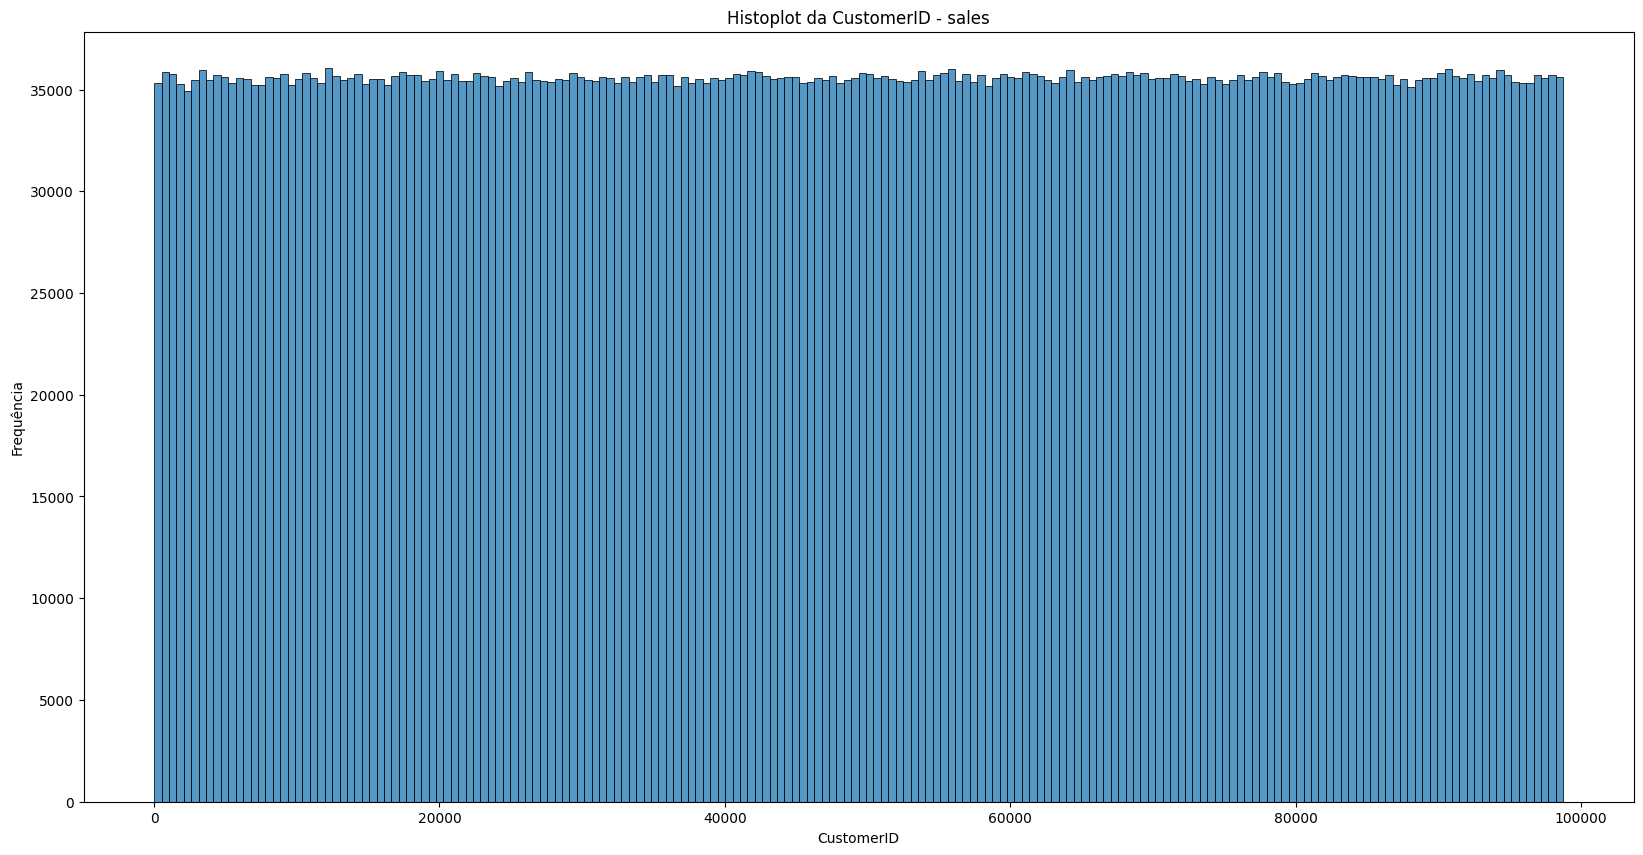

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


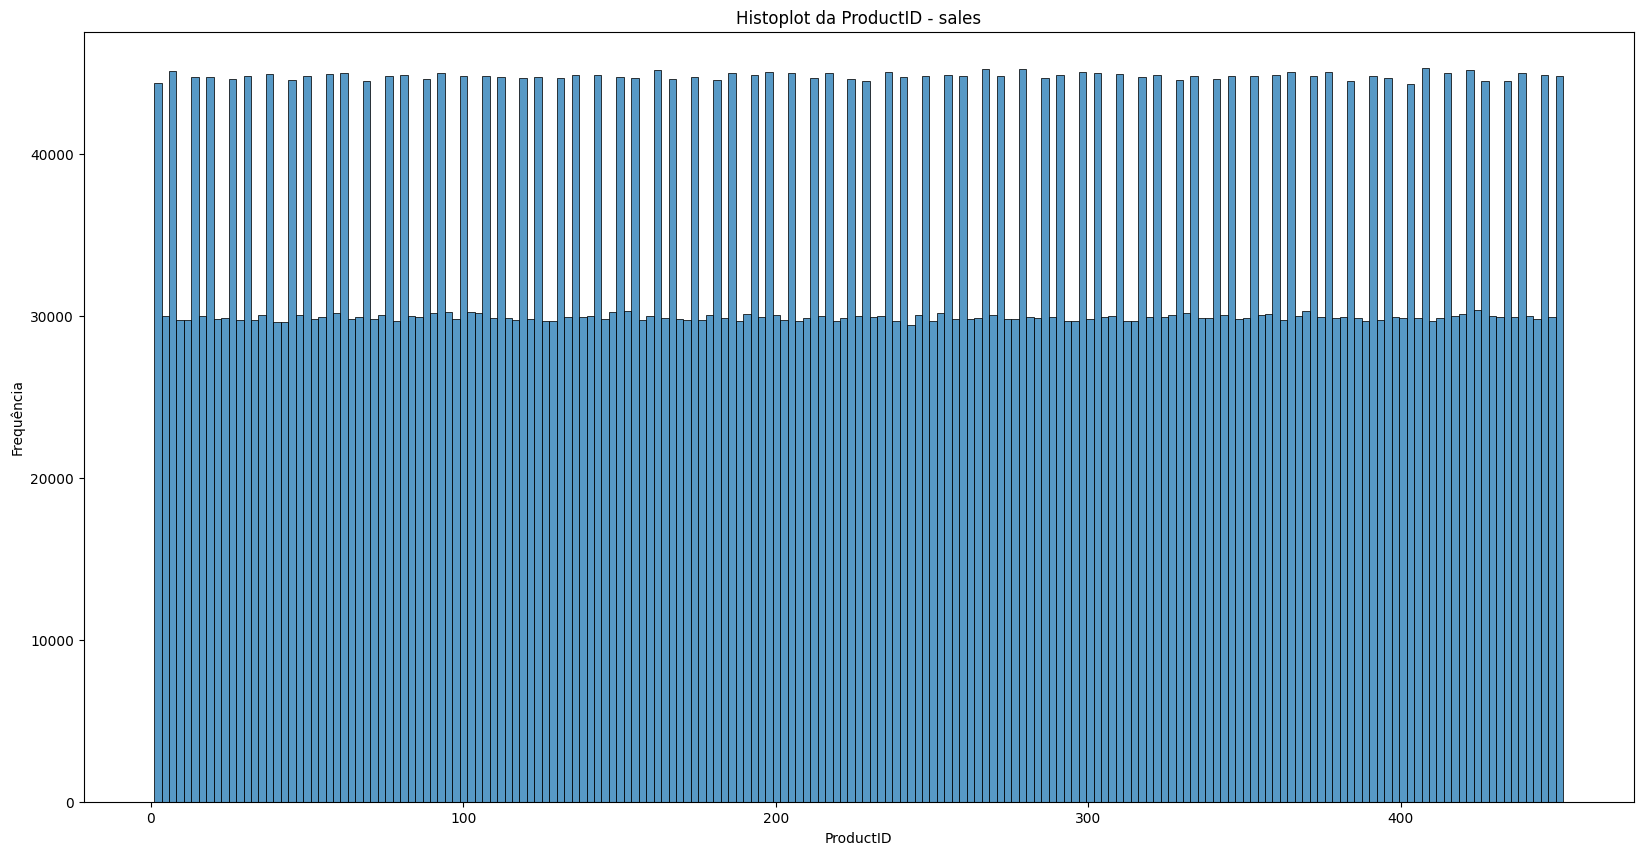

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


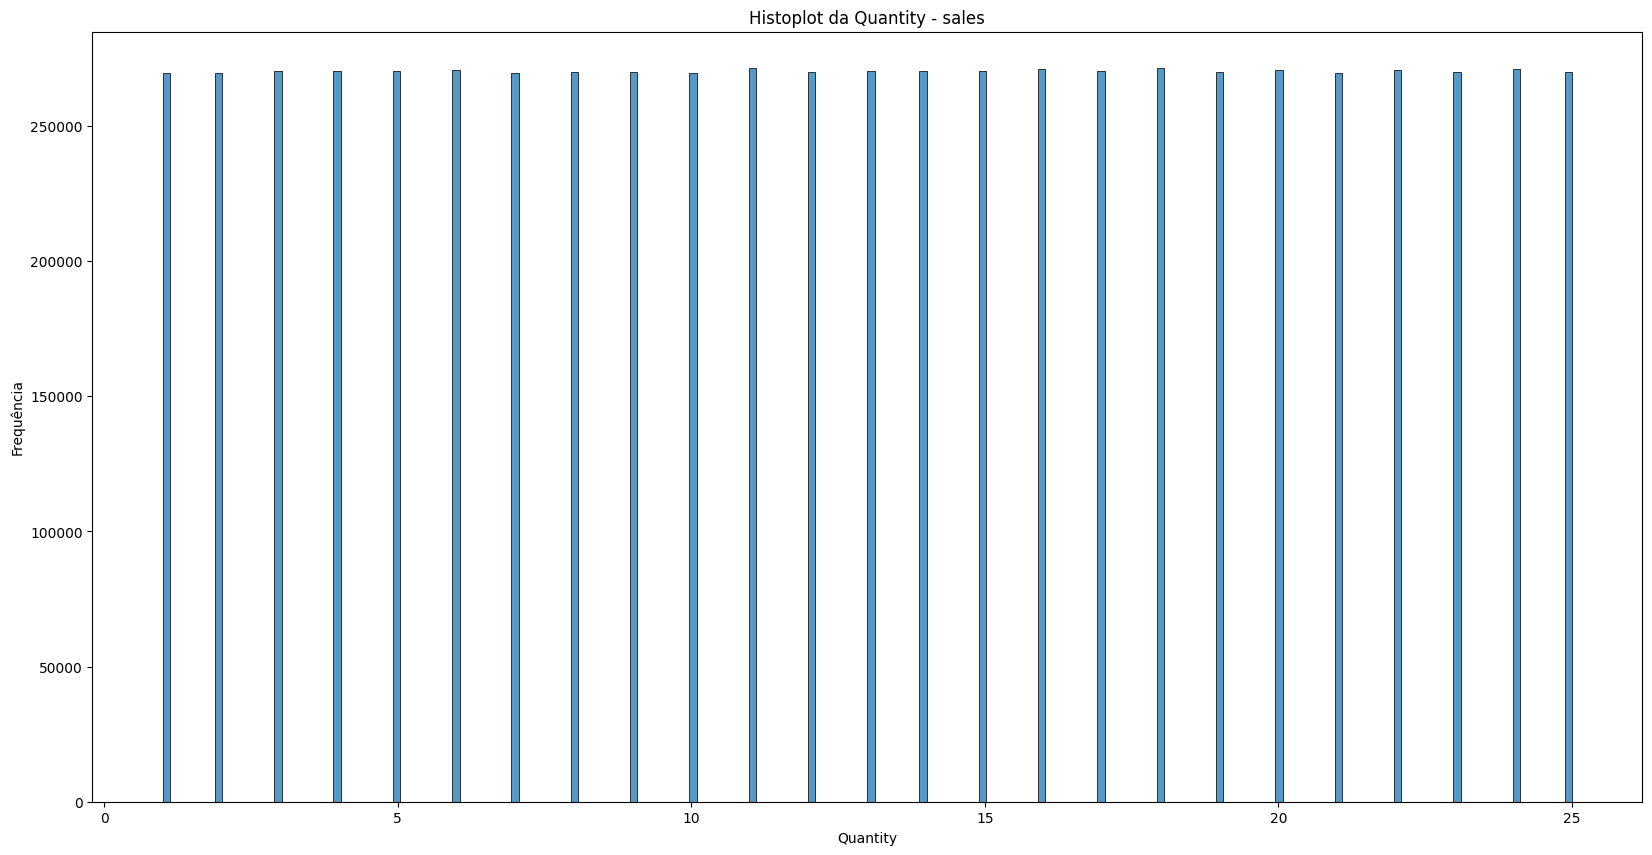

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


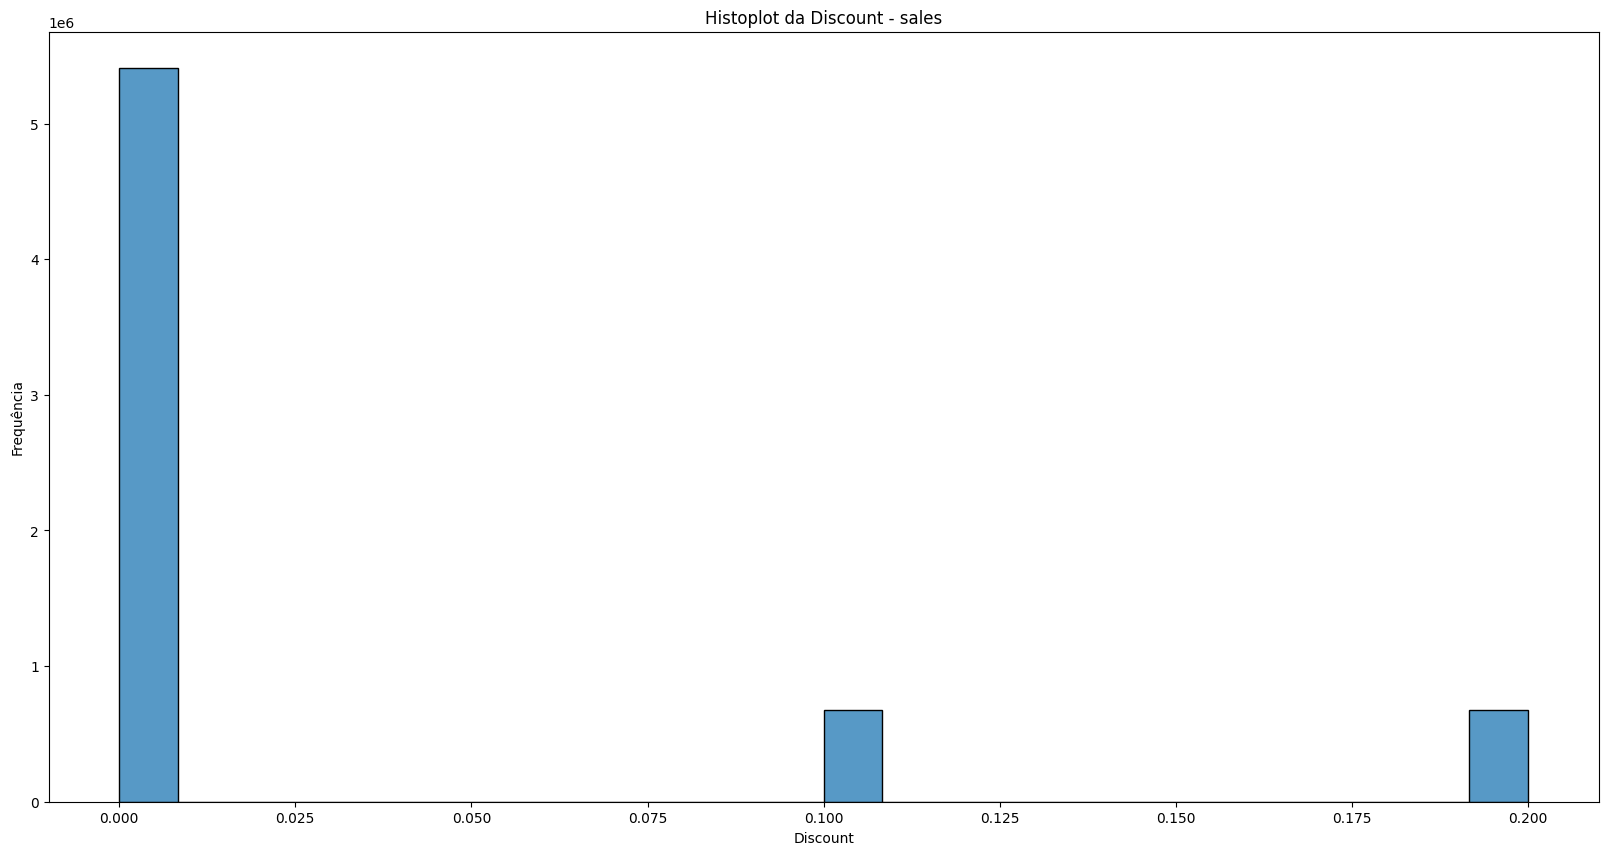

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


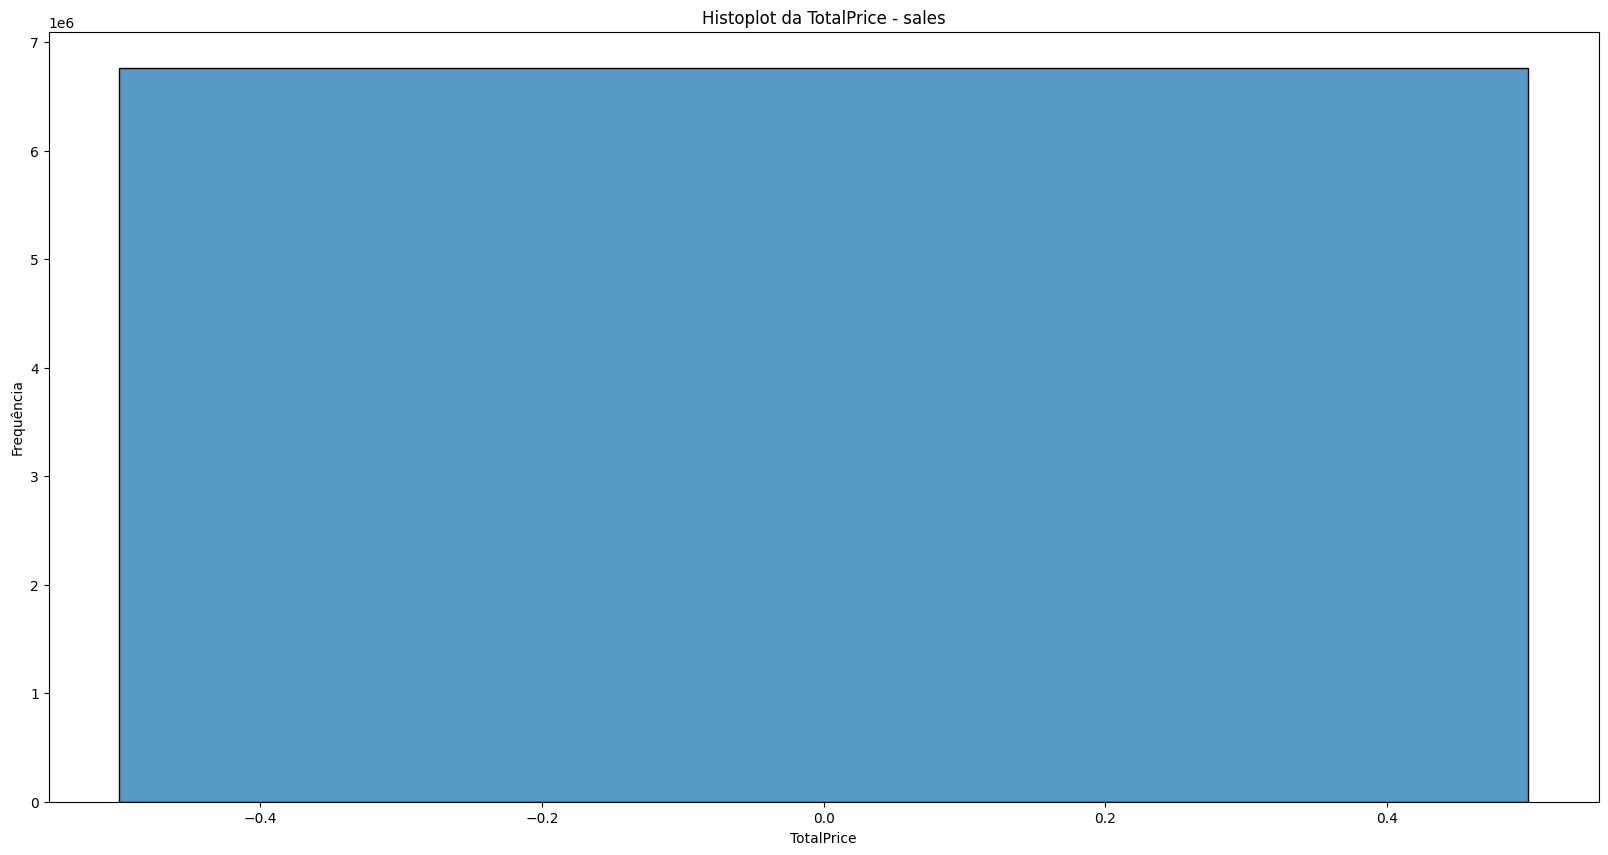

In [6]:
#Vamos gerar gráficos para as analises

def gerar_graficos(df, nome_df):
    print(f"Gerando o gráfico de {nome_df}")
    n_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in n_columns:
        plt.figure(figsize=(20, 10))
        sns.histplot(df[col], kde=False)
        plt.title(f"Histoplot da {col} - {nome_df}")
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.show()

# A ideia seria analisarmos todas as colunas para tirar as informações relevantes
"""    for col in n_columns:
        plt.figure(figsize=(20, 10))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col} - {nome_df}')
        plt.show()
    
    cat_columns = df.select_dtypes(include='object').columns
    for col in cat_columns:
        plt.figure(figsize=(20, 10))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Contagem de {col} - {nome_df}')
        plt.show()
"""    
    # Gerar gráficos para cada dataset
for nome_df, dataset in datasets:
    gerar_graficos(dataset, nome_df)

# Analise de vendas
A ideia é a mesma que a anterior, vamos gerar gráficos e informações sobre as vendas dos produtos

Total de Vendas: 4,466,259,165.52
Total de Unidades Vendidas: 87,882,708.00
Média de Vendas por Transação: 660.87


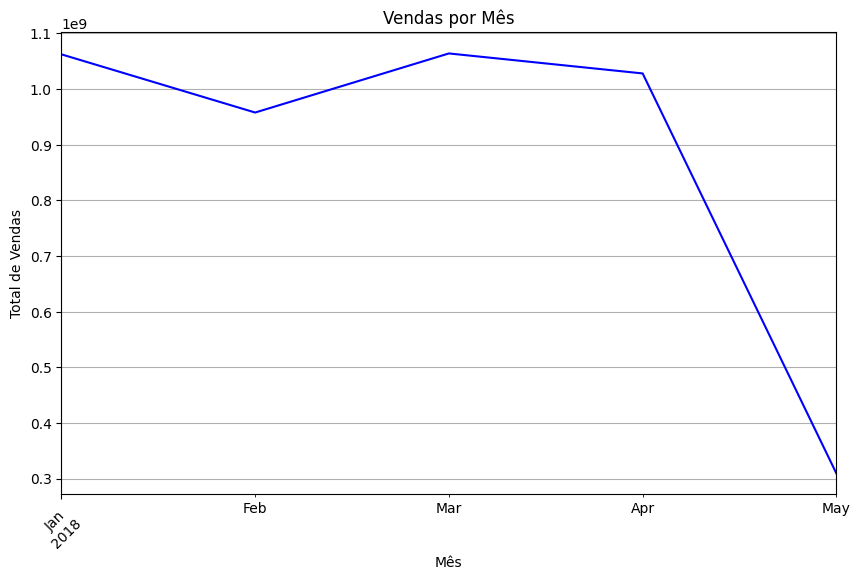


Produtos Mais Vendidos (em Quantidade):
ProductID
179    199724
161    199679
47     198567
280    198163
103    198126
324    198032
39     198032
319    198005
425    197969
184    197942
Name: Quantity, dtype: int64

Produtos com Maior Receita:
ProductID
345    1.944911e+07
98     1.929934e+07
104    1.927706e+07
392    1.926688e+07
149    1.912267e+07
268    1.910619e+07
248    1.893860e+07
201    1.889486e+07
32     1.889130e+07
298    1.879849e+07
Name: total_sales, dtype: float64

Clientes Mais Valiosos (em Vendas):
CustomerID
94800    134409.8328
95972    127844.7325
95048    126282.1575
97863    125921.4750
95157    124663.1275
94138    124564.0872
96775    124459.7625
95868    123487.0400
97813    122779.6475
95363    122691.9550
Name: total_sales, dtype: float64


In [7]:
# Função para análise de vendas
def analise_vendas(df_sales, df_products):
    # Adicionando a coluna total_sales para calcular o valor das vendas
    df_sales = pd.merge(df_sales, df_products[['ProductID', 'Price']], on='ProductID', how='left')
    df_sales['total_sales'] = df_sales['Price'] * df_sales['Quantity']
    
    # Vendas totais
    total_vendas = df_sales['total_sales'].sum()
    total_un_vend = df_sales['Quantity'].sum()
    med_und_vend_trans = df_sales['total_sales'].mean()
    
    print(f"Total de Vendas: {total_vendas:,.2f}")
    print(f"Total de Unidades Vendidas: {total_un_vend:,.2f}")
    print(f"Média de Vendas por Transação: {med_und_vend_trans:,.2f}")
    
    # Análise por Data (vendas por mês)
    df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'])
    vendas_por_mes = df_sales.groupby(df_sales['SalesDate'].dt.to_period('M'))['total_sales'].sum().sort_index()
    plt.figure(figsize=(10, 6))
    vendas_por_mes.plot(kind='line', color='blue')
    plt.title('Vendas por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Total de Vendas')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    
    # Vendas por Produto
    vendas_por_produto = df_sales.groupby('ProductID')['total_sales'].sum().sort_values(ascending=False)
    produtos_mais_vendidos = df_sales.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
    
    print("\nProdutos Mais Vendidos (em Quantidade):")
    print(produtos_mais_vendidos.head(10))
    
    print("\nProdutos com Maior Receita:")
    print(vendas_por_produto.head(10))
    
    # Vendas por Cliente
    vendas_por_cliente = df_sales.groupby('CustomerID')['total_sales'].sum().sort_values(ascending=False)
    clientes_mais_valiosos = vendas_por_cliente.head(10)
    
    print("\nClientes Mais Valiosos (em Vendas):")
    print(clientes_mais_valiosos)
    
    # Análise de vendas por região/cidade (se disponível)
    if 'city' in df_sales.columns:
        vendas_por_cidade = df_sales.groupby('city')['total_sales'].sum().sort_values(ascending=False)
        print("\nVendas por Cidade:")
        print(vendas_por_cidade.head(10))


# Certifique-se de que os datasets sales e products estão definidos corretamente
# Exemplo:
df_sales = sales  # Substitua 'sales' pelo nome correto do seu dataframe
df_products = products  # Substitua 'products' pelo nome correto do seu dataframe

# Chamar a função para realizar a análise
analise_vendas(df_sales, df_products)
